# BELLABEAT PROJECT


###### Business Task:

Analyze smart device usage data to gain insight into how consumers use non-Bellabeat smart devices and find trends in the data in order to help the stakeholders: Urška Sršen, 
Sando Mur and the Marketing Analytics team to make informed decisions about the marketing strategy to use for the products.

Dataset Informations:

  The data is stored in the kaggle public datasetunder the name Kaggle: FitBit Fitness Tracker Data which consists of 18 csv files
  
Are there issues with bias or credibility in this data? 

  There are some issue with the data especially the one considering that the data might be old as it was generated between 03.12.2016 - 05.12.2016 and might not be reliable at the current date in 2022. 
   There is only 30 records in the dataset which corresponds to 30 respondent, it is not a big enough sample size to perform analysis that can give precise insight. Plus, no information about the genre of the FitBit Fitness Tracker which can produce results that might not  be representative of the population of women who use smart device for their health tracking.



  Does your data ROCCC?
 To answer this question, we have to remind the definition of ROCCC which stands for:
 
 R: Reliable - LOW - Not reliable as it only has 30 respondents

 O: Original - LOW - Third party provider (Amazon Mechanical Turk)
 
 C: Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
 
 C: Current  - LOW - Data is 6 years old and is not relevant
 
 C: Cited  - LOW - Data collected from third party, hence unknown
     


In [2]:
#import all the packages needed
import pandas as pd 
import numpy as np
import matplotlib as mp
import datetime as dt

In [3]:
#importing the dataset
daily_activity = pd.read_csv("dailyActivity_merged.csv")


# OBSERVATION OF THE DATA


In [4]:
#preview of the 10 first records of the dataframe

daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [5]:
#preview of the last 10  records of the dataframe

daily_activity.tail(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
930,8877689391,5/3/2016,10818,8.210000,8.210000,0.0,1.39,0.10,6.67,0.01,19,3,229,1189,2817
931,8877689391,5/4/2016,18193,16.299999,16.299999,0.0,10.42,0.31,5.53,0.00,66,8,212,1154,3477
932,8877689391,5/5/2016,14055,10.670000,10.670000,0.0,5.46,0.82,4.37,0.00,67,15,188,1170,3052
933,8877689391,5/6/2016,21727,19.340000,19.340000,0.0,12.79,0.29,6.16,0.00,96,17,232,1095,4015
934,8877689391,5/7/2016,12332,8.130000,8.130000,0.0,0.08,0.96,6.99,0.00,105,28,271,1036,4142
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [6]:
# Infomations about the dataframe

daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

We can see that the dataframe contains 14 non-null columns and 940 rows

In [7]:
#obtain the number of null cells per columns
missing_value_count = daily_activity.isnull().sum()
missing_value_count

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

No column in the dataset contain missing values

#  CLEANING AND MANIPULATION 

In [10]:
#When looking at the columns, I noticed that the date was in the wrong format
#I will change the date format to the correct one

daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format ="%m/%d/%Y" )   

In [11]:
# Creation of a column dayOfTheWeek representing the day of the week

daily_activity['DayOfTheWeek'] = daily_activity['ActivityDate'].dt.day_name()

daily_activity['DayOfTheWeek'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [12]:
#Creation of a column TotalMin which is the sum of 4 columns

daily_activity['TotalMin'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes'] + daily_activity['SedentaryMinutes']

daily_activity['TotalMin'].head()

0    1094
1    1033
2    1440
3     998
4    1040
Name: TotalMin, dtype: int64

In [13]:
#Creation of a column TotalHours converting TotalMin in hours

daily_activity['TotalHours'] = round(daily_activity['TotalMin']/60)

daily_activity['TotalHours'].head()

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: TotalHours, dtype: float64

In [14]:
#Rearranging the column names
#r create new list of rearranged columns

new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance',
            'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',
            'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance',
            'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes',
            'TotalMin', 'TotalHours', 'Calories']

#reindex function to rearrange columns based on new_cols 

daily_activity = daily_activity.reindex(columns = new_cols)

daily_activity.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMin,TotalHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,17.0,1863


# ANALYZING

In [15]:
#Let's see the statistics of each columns of the data frame
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMin,TotalHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


# INTERPRETATION OF FINDINGS

Interpreting statistical findings:

On average, users logged 7,637 steps or 5.4km which is not adequate. As recommended by CDC, an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. Source: Medical News Today article

Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.

Noting that average calories burned is 2,303 calories equivalent to 0.6 pound. Could not interpret into detail as calories burned depend on several factors such as the age, weight, daily tasks, exercise, hormones and daily calorie intake. Source: Health Line article

# SHARE OF THE FINDINGS

### Creation of the visualiations

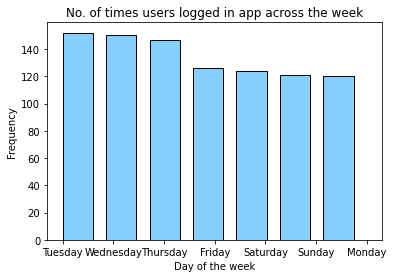

In [16]:
#importation of the packages 
from matplotlib import pyplot as plt

#plotting  histogram
fig, ax = plt.subplots(figsize =(6, 4))
plt.hist(daily_activity.DayOfTheWeek, bins = 7, width = 0.6, color="lightskyblue", edgecolor= "black")

plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.show()

### Frequency usage accross the week 

In this histogram, we are looking at the frequency of FitBit app usage in terms of days of the week.

We discovered that users prefer or remember (giving them the doubt of benefit that they forgotten) to track their activity on the app during midweek from Tuesday to Friday.

Noting that the frequency dropped on Friday and continue on weekends and Monday.

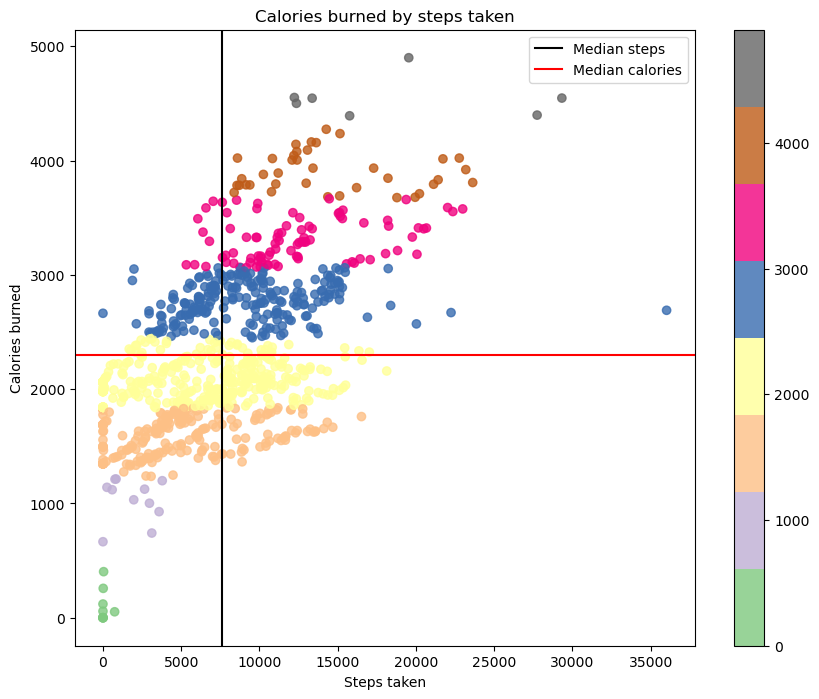

In [17]:
#plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(10,8))
plt.scatter(daily_activity.TotalSteps, daily_activity.Calories, alpha = 0.8,
           c= daily_activity.Calories, cmap= "Accent")

#Add of the annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color= "black", label= "Median steps")
plt.axhline(median_calories, color="red", label= "Median calories")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned by steps taken")
plt.legend()
plt.show()



From the scatter plot, we discovered that:

It is a positive correlation.

We observed that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards.

Noted a few outliers:

Zero steps with zero to minimal calories burned.
1 observation of > 35,000 steps with < 3,000 calories burned.
Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human error).

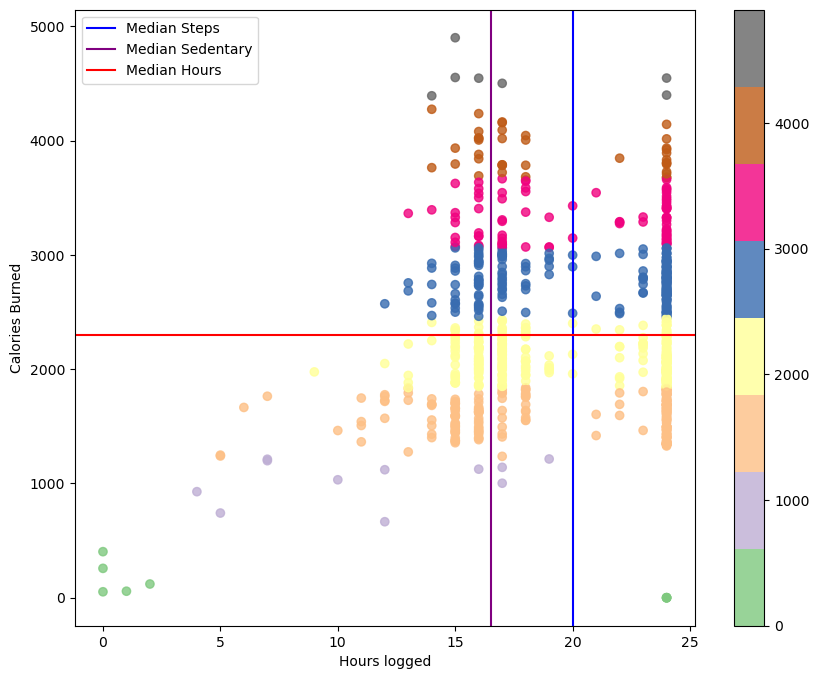

In [18]:
#PLotting scatter plot
plt.style.use("default")
plt.figure(figsize=(10, 8))
plt.scatter(daily_activity.TotalHours, daily_activity.Calories, alpha = 0.8,
           c= daily_activity.Calories, cmap= "Accent")


#adding annotation and visuals
median_calories = 2303
median_hours= 20
median_sedentary = 991 / 60

plt.colorbar(orientation="vertical")
plt.axvline(median_hours, color="blue", label="Median Steps")
plt.axvline(median_sedentary, color="purple", label="Median Sedentary")
plt.axhline(median_calories, color="red", label="Median Hours")
plt.xlabel("Hours logged")
plt.ylabel( "Calories Burned")
plt.legend()
plt.show()

#### Calories burned for every hour logged
The scatter plot is showing:

A weak positive correlation whereby the increase of hours logged does not translate to more calories being burned. That is largely due to the average sedentary hours (purple line) plotted at the 16 to 17 hours range.

Again, we can see a few outliers:

The same zero value outliers

An unusual red dot at the 24 hours with zero calorie burned which may be due to the same reasons as above.

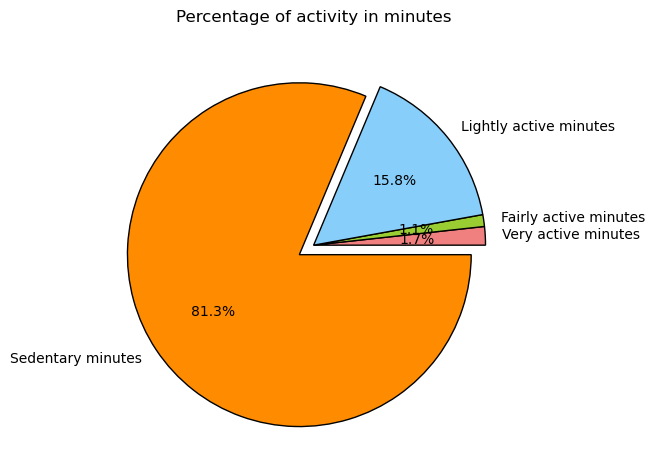

In [34]:
# calculating total of individual minutes column

very_active_mins= daily_activity['VeryActiveMinutes'].sum()
fairly_active_mins = daily_activity['FairlyActiveMinutes'].sum()
lightly_active_mins = daily_activity['LightlyActiveMinutes'].sum()
sedentary_mins = daily_activity['SedentaryMinutes'].sum()


#Plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes","Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, colors = colours, explode = explode, wedgeprops = {"edgecolor": "black"},
       autopct = "%1.1f%%")
plt.title("Percentage of activity in minutes")
plt.tight_layout()
plt.show()


##### Percentage of Activity in Minutes

As seen from the pie chart,

Sedentary minutes takes the biggest slice at 81.3%.

This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

## Conclusion and recommendations

In the final step, we will be delivering our insights and providing recommendations based on our analysis.

Here, we revisit our business questions and share with you our high-level business recommendations.

1. What are the trends identified?

Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.

Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends.

2. How could these trends apply to Bellabeat customers?

Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can very well be applied to Bellabeat customers.
3. How could these trends help influence Bellabeat marketing strategy?

Bellabeat marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.

On weekends, Bellabeat app can also prompt notification to encourage users to exercise.